# Analysis of simulation result

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

---

## Load simulation trajectory

In [2]:
positions_history = []

with h5py.File("../output.h5", "r") as store:
    chain_ranges = store["metadata/chain_ranges"][:]
    particles = store["metadata/particles"][:]

    for step in store["snapshots/steps"]:
        positions = store["snapshots"][step]["positions"][:]
        positions_history.append(positions)

positions_history = np.array(positions_history)

---

## Analyze flow

### Visualization of particle dynamics

Here, we visualize projected paths of some of the particles. As we apply z-directional
force to particles around integral z planes (z = 1, 2, 3, …), we see jumps at integral
z values. Otherwise the particles look to be diffusing. (Really?)

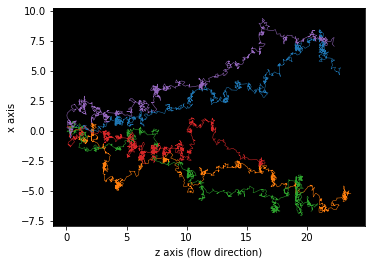

In [3]:
fig, ax = plt.subplots(figsize=(10, 4))

for i in particles[:5]:
    x = positions_history[:, i, 2]
    y = positions_history[:, i, 0]
    ax.plot(x, y, lw=0.5, zorder=2)

ax.set_ylabel("x axis")
ax.set_xlabel("z axis (flow direction)")
ax.patch.set_facecolor("black")
ax.set_aspect("equal")

pass

Let's examine the $ z $ coordinate values of the particles. As we see, in the z direction,
the motion of the particles is not diffusive, but directional. So, there is a flow.

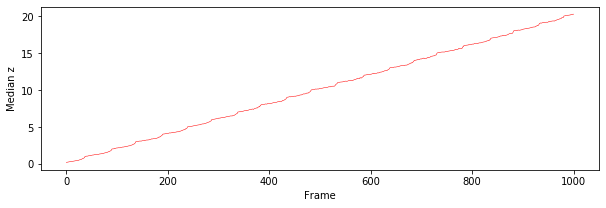

In [4]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(np.median(positions_history[:, :, 2], axis=1), lw=0.5, color="red")
ax.set_xlabel("Frame")
ax.set_ylabel("Median z")
pass

In the other directions the particles are just diffusive.

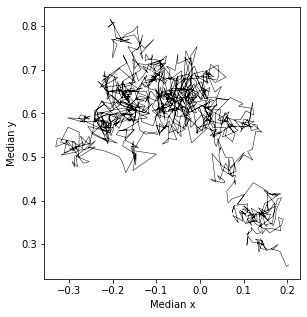

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
x = np.median(positions_history[:, :, 0], axis=1)
y = np.median(positions_history[:, :, 1], axis=1)
ax.plot(x, y, lw=0.5, color="black")
ax.set_xlabel("Median x")
ax.set_ylabel("Median y")
ax.set_aspect("equal")
pass

### Motion of the chain

Although the flow force is not applied to the chain, the chain flows to the z direction
very slowly (~0.1x compared to the particles). The flowing particles push the heavy chain
towards z direction!

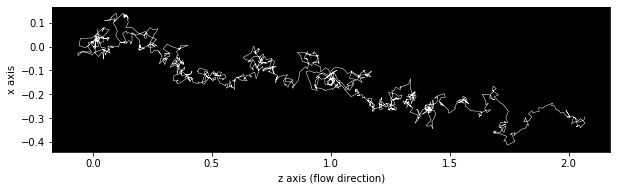

In [6]:
start, end = chain_ranges[0]
chain_history = positions_history[:, start:end]
center_of_mass_history = np.mean(chain_history, axis=1)

fig, ax = plt.subplots(figsize=(10, 4))

x = center_of_mass_history[:, 2]
y = center_of_mass_history[:, 0]
ax.plot(x, y, lw=0.5, color="white")

ax.set_ylabel("x axis")
ax.set_xlabel("z axis (flow direction)")
ax.patch.set_facecolor("black")
ax.set_aspect("equal")

pass

The motion is linear.

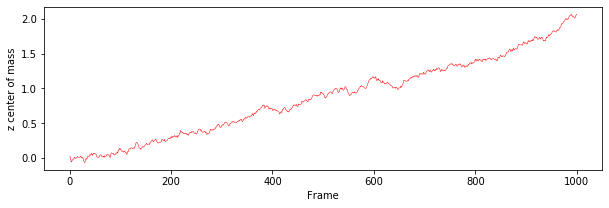

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(center_of_mass_history[:, 2], lw=0.5, color="red")
ax.set_xlabel("Frame")
ax.set_ylabel("z center of mass")
pass